# **1. Dataset Introduction**


The dataset used in this experiment is the **Pima Indians Diabetes Dataset**. This dataset is obtained from the public Kaggle repository, while its original source comes from the *National Institute of Diabetes and Digestive and Kidney Diseases*. The dataset has specific demographic characteristics due to sample selection constraints, where all recorded patients are women aged at least 21 years and of Pima Indian descent.

The main objective of using this dataset is to build a *Machine Learning* model (Supervised Learning) for a **Binary Classification** problem. The model is expected to diagnostically predict whether a patient has diabetes or not based on a series of medical measurements.

This dataset consists of several independent variables (medical features) and one dependent variable (target). The following are the details of the attributes:

* **Pregnancies:** Number of times the patient has been pregnant.
* **Glucose:** Plasma glucose concentration (2-hour oral glucose tolerance test).
* **BloodPressure:** Diastolic blood pressure (mm Hg).
* **SkinThickness:** Triceps skin fold thickness (mm), an indicator of body fat.
* **Insulin:** 2-hour serum insulin (mu U/ml).
* **BMI:** Body Mass Index (weight in kg / (height in m)\^2).
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a score indicating the likelihood of diabetes based on family history).
* **Age:** Patient age (years).
* **Outcome (Target):** Class variable (0 or 1).
  * `0`: Non-diabetic (Negative).
  * `1`: Diabetic (Positive).

**Dataset Link:**
[Kaggle - Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/)

# **2. Import Library**

In [ ]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set_theme(style="dark")

# Create the output folder if it does not exist
if not os.path.exists("output"):
    os.makedirs("output")

OUTPUT = "output"

# **3. Load Dataset**

The raw dataset has been saved in the `../dataset/` directory.

In [ ]:
DATASET_PATH = os.path.join("..", "dataset", "diabetes.csv")
df = pd.read_csv(DATASET_PATH, sep=",", encoding="utf-8")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **4. Exploratory Data Analysis (EDA)**

## **4.1. Initial Exploration**

In [ ]:
# Display the first 10 rows of the dataset for inspection
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# View general dataset information (data types and non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Check the number of duplicate rows
print("Jumlah baris data duplikat:", end=" ")
print(df.duplicated().sum())

Jumlah baris data duplikat: 0


In [ ]:
# Check the number of missing / null values
print("Jumlah data null:")
print(df.isna().sum())

Jumlah data null:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Display descriptive statistics for all numeric variables
df.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [ ]:
# Check the number of zero values in 5 columns where zeros are not realistic

zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
zero_counts = (df[zero_columns] == 0).sum()

summary_df = pd.DataFrame(zero_counts, columns=["Number of Zero Values"])
summary_df["Percentage (%)"] = ((summary_df["Number of Zero Values"] / len(df)) * 100).round(3)
summary_df = summary_df.sort_values(by="Number of Zero Values", ascending=True)
summary_df

,Number of Zero Values,Percentage (%)
Glucose,5,0.651
BMI,11,1.432
BloodPressure,35,4.557
SkinThickness,227,29.557
Insulin,374,48.698


In [ ]:
rows_with_zeros = df[(df[zero_columns] == 0).any(axis=1)].copy()

print(f"Number of rows with zero values in columns {zero_columns}: {len(rows_with_zeros)}")

# Sample rows of the data
display(rows_with_zeros.sample(10))

Number of rows with zero values in columns ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']: 376


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
201,1,138,82,0,0,40.1,0.236,28,0
587,6,103,66,0,0,24.3,0.249,29,0
321,3,112,74,30,0,31.6,0.197,25,1
367,0,101,64,17,0,21.0,0.252,21,0
767,1,93,70,31,0,30.4,0.315,23,0
268,0,102,52,0,0,25.1,0.078,21,0
502,6,0,68,41,0,39.0,0.727,41,1
737,8,65,72,23,0,32.0,0.600,42,0
408,8,197,74,0,0,25.9,1.191,39,1
394,4,158,78,0,0,32.9,0.803,31,1


Based on the initial observation of the dataset, which includes reviewing sample values in each row, general data information (number of observations, data types, and non-null counts), and descriptive statistical results, several findings can be summarized as follows:

1. The `diabetes.csv` dataset consists of 9 variables, including 8 feature variables and 1 target variable.

2. The dataset contains a total of 768 rows.

3. All variables, both features and the target, are of numeric data types.

4. Although the general data information shows no null values, direct observation and descriptive statistical analysis indicate the presence of unrealistic values in several variables. The variables `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` contain zero (0) values, which are medically impossible. This condition indicates the presence of missing values represented as zeros. Therefore, in this study, zero values in these five variables are treated as null values.

5. By treating zero values as null as described in point (4), the actual number of missing values is obtained as follows: `Glucose` = 5, `BloodPressure` = 35, `SkinThickness` = 227, `Insulin` = 374, and `BMI` = 11. These findings show that the variables `SkinThickness` and `Insulin` have the highest proportion of missing values.

6. The scale of each feature in the dataset varies widely and has not been normalized, so a data preprocessing stage is required before modeling.

7. The variable `Insulin` has a mean value of 79.79, a standard deviation of 115.24, and a maximum value of 846.0. This condition indicates the presence of outliers and a highly skewed data distribution.

8. The target variable `Outcome` is binary (0 or 1) and has a mean value of 0.3489. This indicates that the class distribution is imbalanced, with the negative class being more dominant than the positive class.

9. The dataset does not contain duplicate data, so no additional handling related to data duplication is required.

## **4.2. Advanced Exploration**

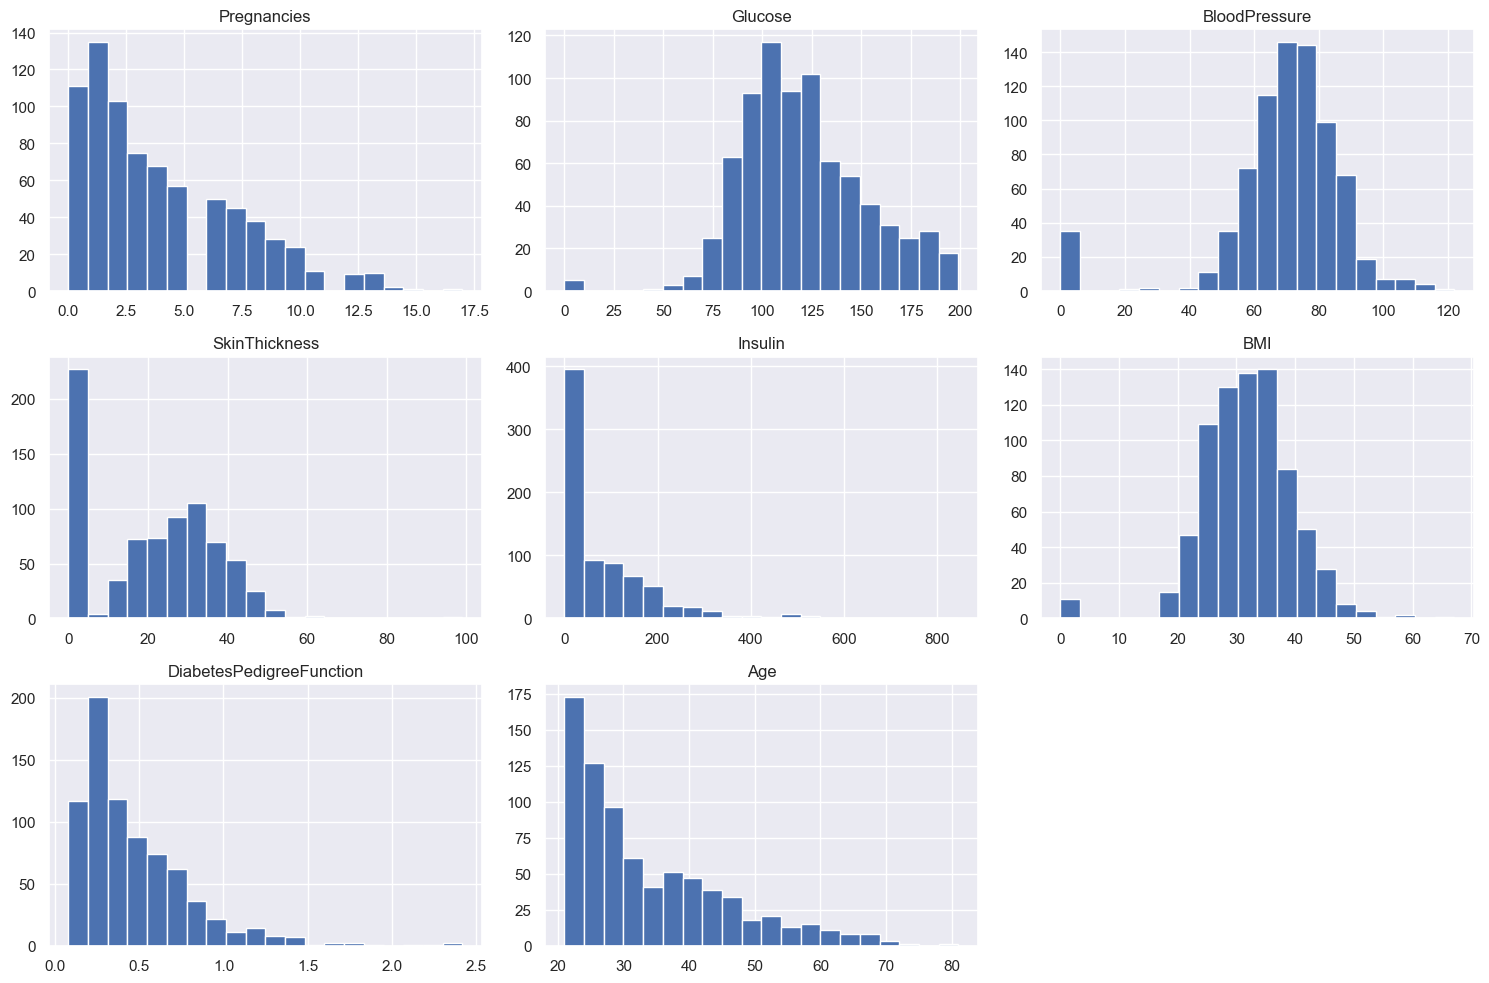

In [ ]:
# View the distribution of all numeric feature variables (histogram)

df.drop(columns=["Outcome"]).hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

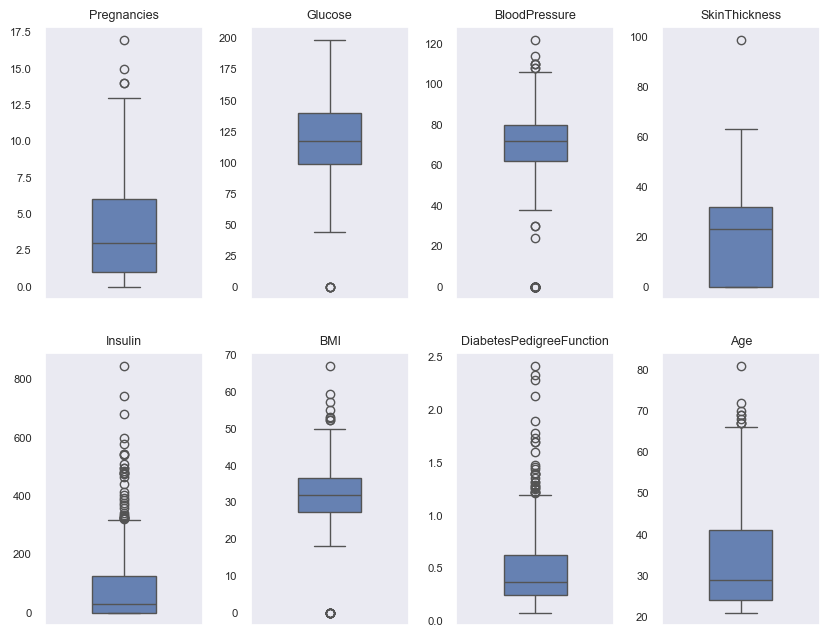

In [ ]:
# Boxplot analysis of feature variables to detect potential outliers

plt.figure(figsize=(10, 12))

for i, col in enumerate(df.drop(columns=["Outcome"]).columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, y=col, color="#597dbf", width=0.4)
    plt.title(col, fontsize=9)
    plt.ylabel("")
    plt.xlabel("")
    plt.tick_params(axis="y", labelsize=8)

plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

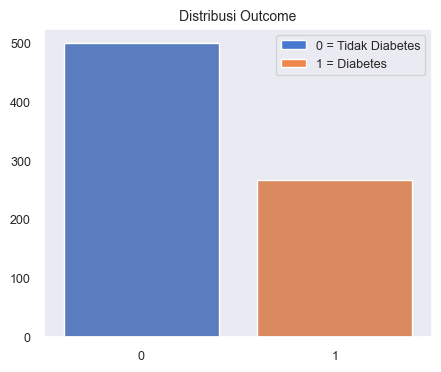

In [ ]:
# Analyze the distribution of the target variable `Outcome`

plt.figure(figsize=(5, 4))
plt.tight_layout()

fig = sns.countplot(data=df, x="Outcome", hue="Outcome", palette="muted")

legend_elements = [
    Patch(facecolor=sns.color_palette("muted")[0], label="0 = Tidak Diabetes"),
    Patch(facecolor=sns.color_palette("muted")[1], label="1 = Diabetes")
]

plt.legend(handles=legend_elements, loc="upper right", fontsize=9)
plt.title("Distribusi Outcome", fontsize=10)
plt.xlabel("")
plt.ylabel("")
plt.tick_params(axis="x", labelsize=9)
plt.tick_params(axis="y", labelsize=9)
plt.show()

In [ ]:
# Analyze the proportion of the target variable `Outcome`
df["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

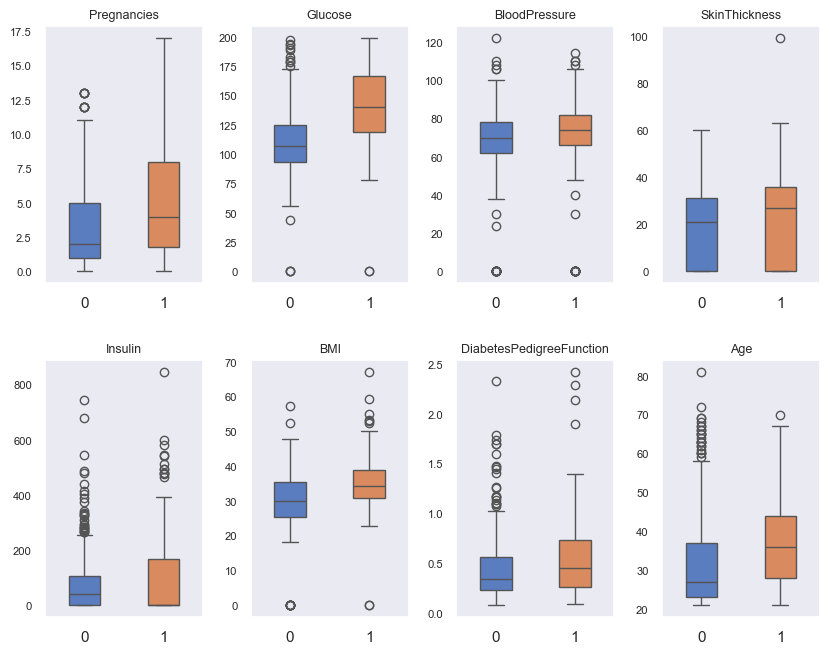

In [ ]:
# Analyze the distribution of features with respect to the target using boxplots

plt.figure(figsize=(10, 12))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=df, x="Outcome", y=col, hue="Outcome", palette="muted", legend=False, width=0.4)
    plt.title(col, fontsize=9)
    plt.ylabel("")
    plt.xlabel("")
    plt.tick_params(axis="y", labelsize=8)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

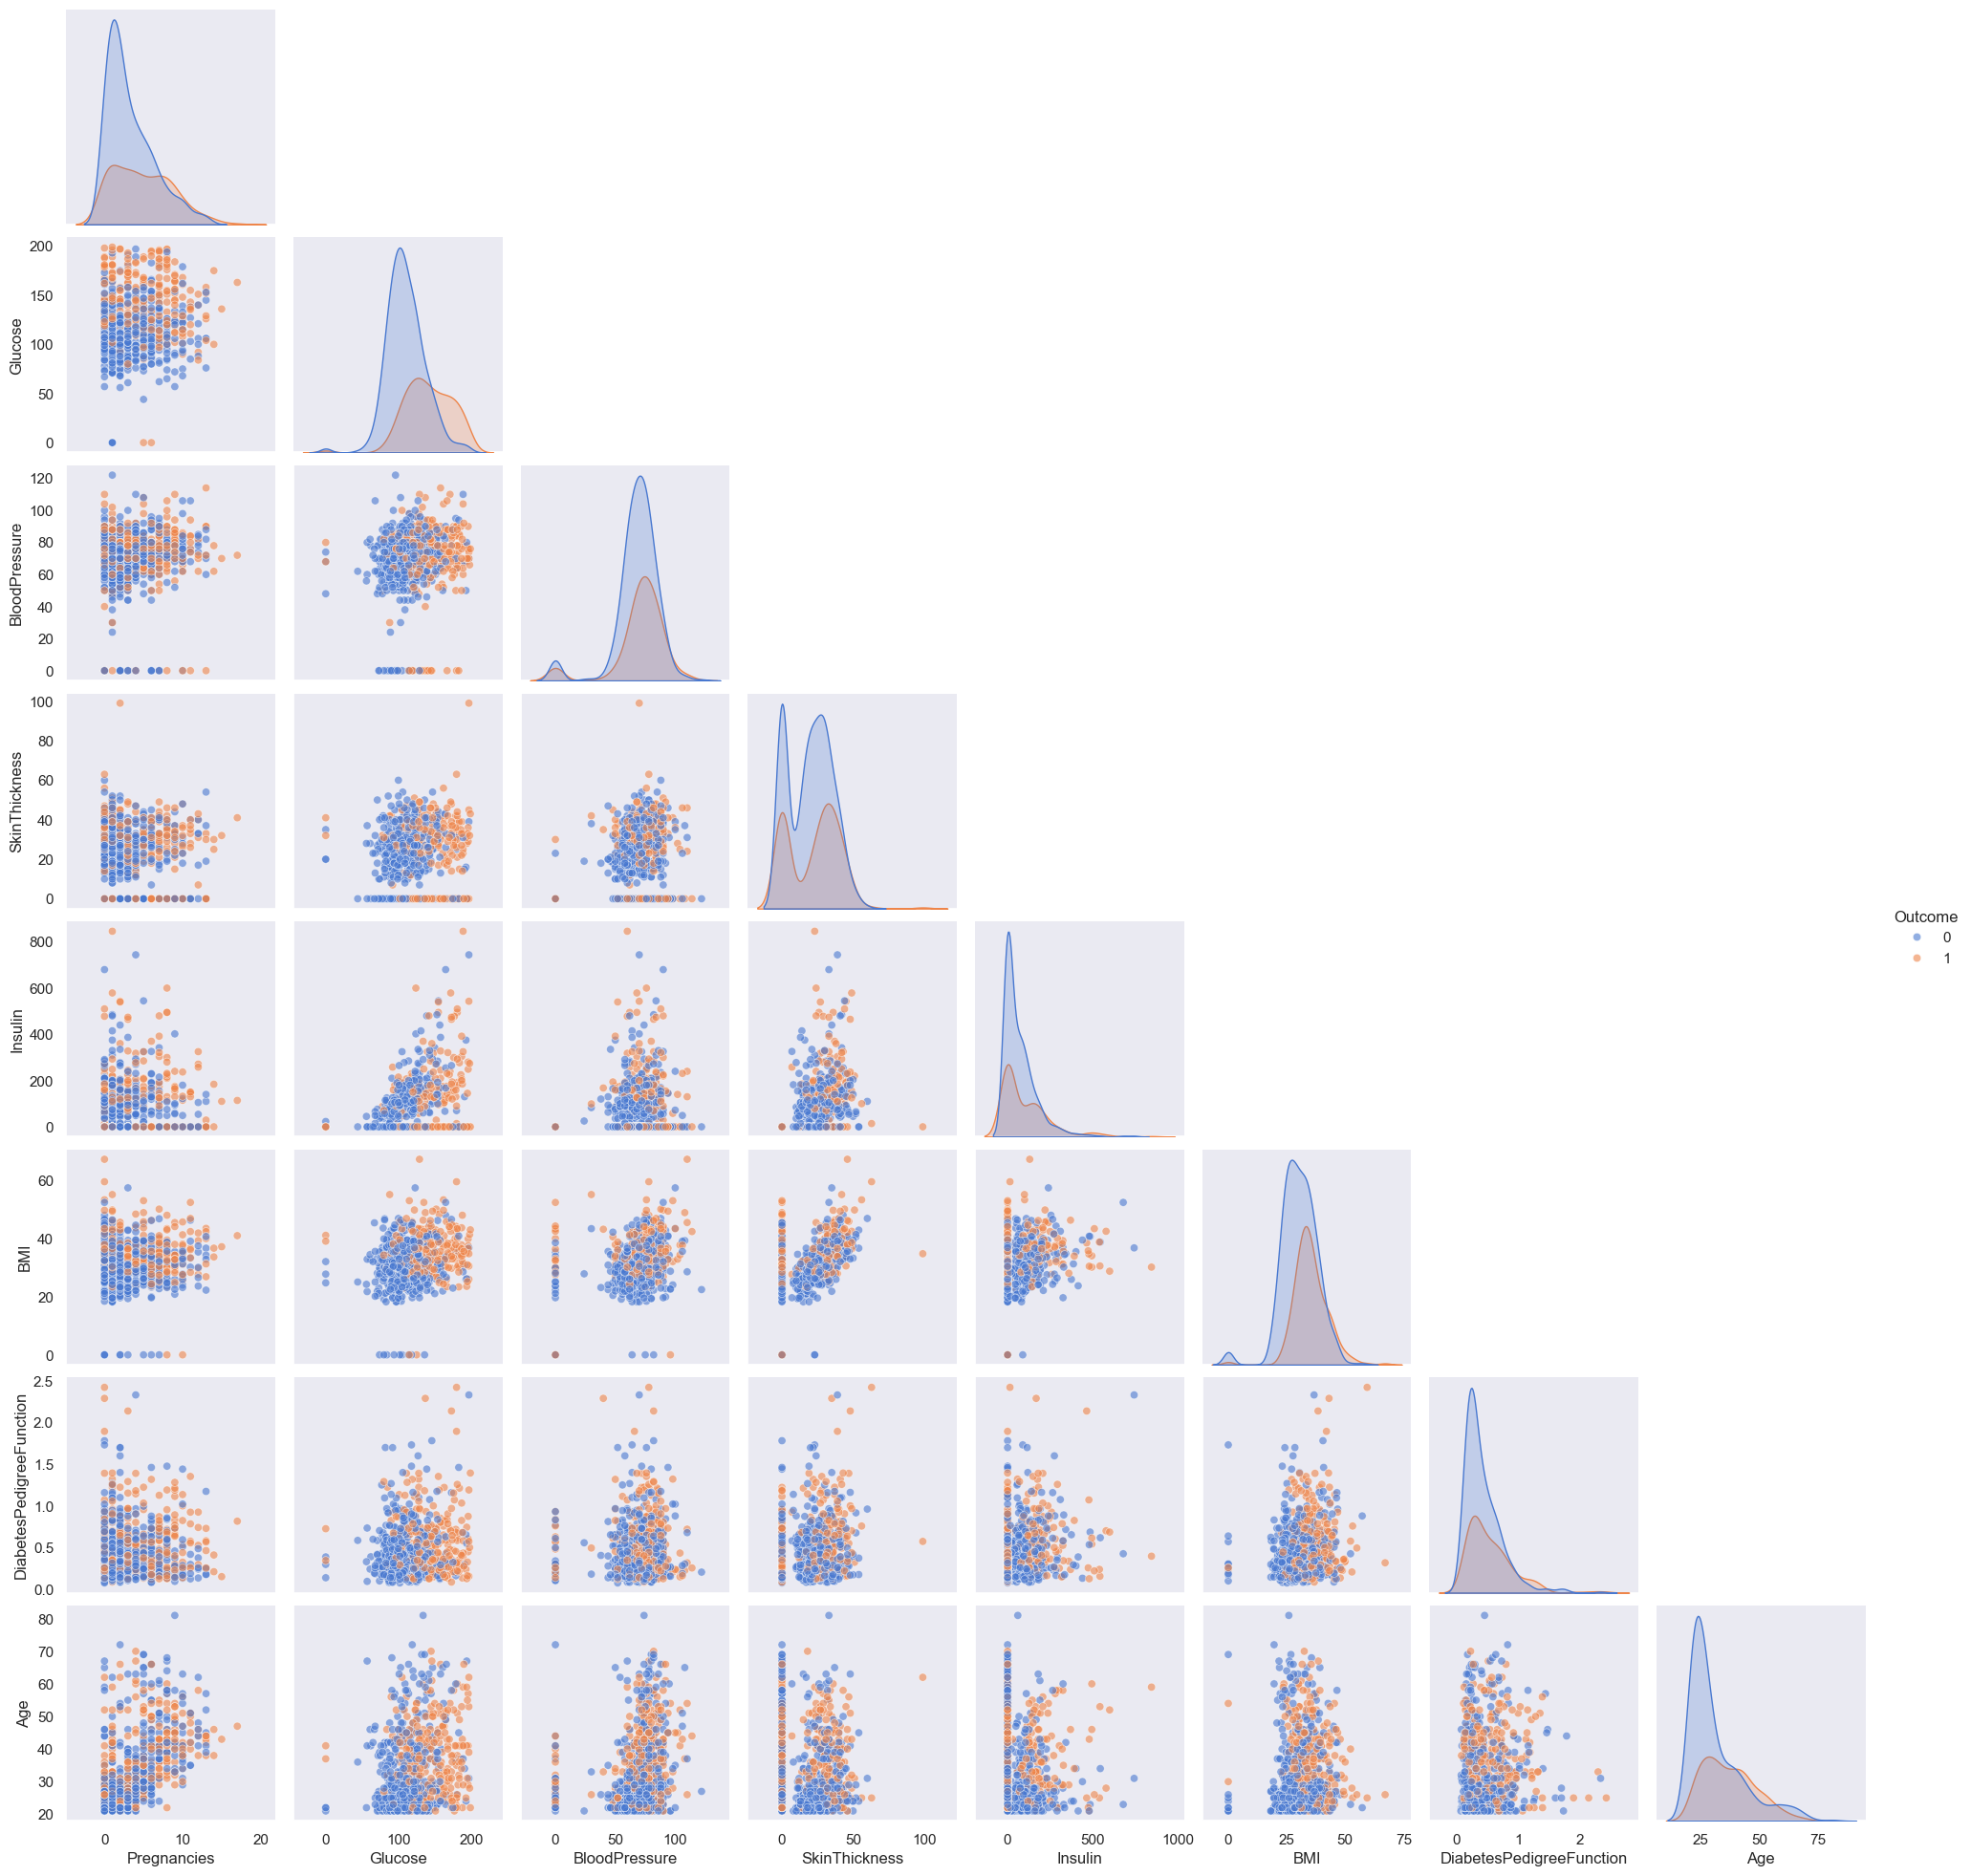

In [ ]:
# Analyze scatter plot distributions between variables

fig = sns.pairplot(df, hue="Outcome", palette="muted", corner=True, plot_kws={"alpha": 0.6})
plt.show()

In [ ]:
# Analyze correlations between variables
df.corr().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


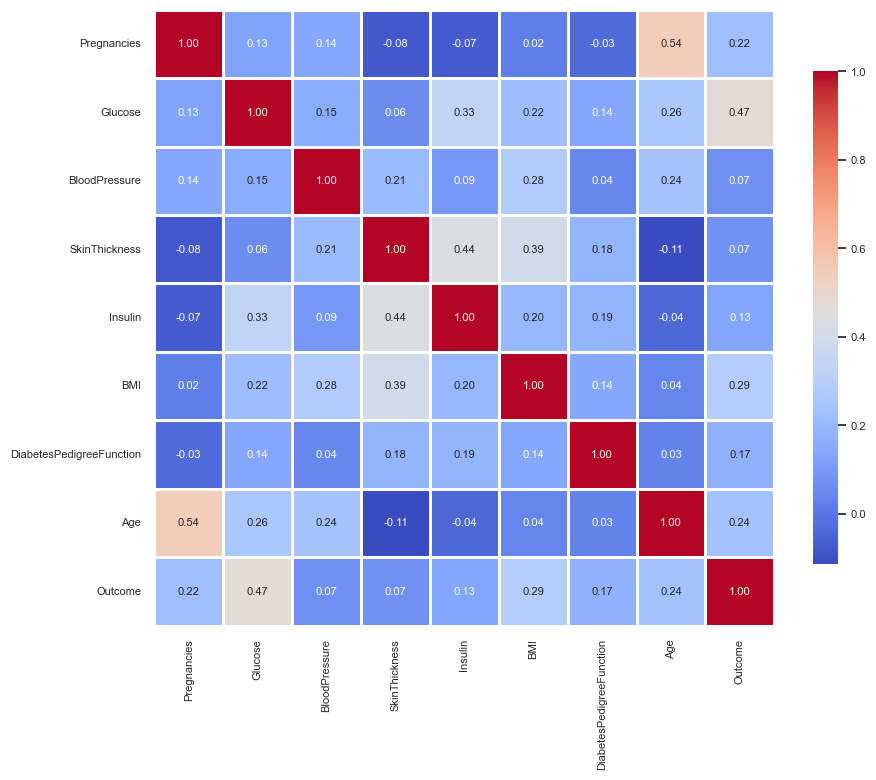

In [ ]:
# Analyze correlations between variables using a heatmap

plt.figure(figsize=(10, 8))

fig = sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 8},
    linewidths=1,
    linecolor="white",
    cbar_kws={"shrink": 0.8}
)

plt.ylabel("")
plt.xlabel("")
plt.tick_params(axis="y", labelsize=8)
plt.tick_params(axis="x", labelsize=8)
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

plt.show()

## **4.3. EDA Insights**

Based on a series of statistical analyses and data visualizations (*EDA*) that have been conducted, several key findings describing the characteristics, data quality, and challenges of the Pima Indians Diabetes dataset can be summarized as follows.

---

1. **Data Quality and Hidden *Missing Values***

    The most crucial finding in this dataset is the presence of **hidden missing values** represented by the value `0` in several vital medical variables. Clinically, a value of zero is impossible for the following variables:
    - `Glucose`
    - `BloodPressure`
    - `SkinThickness`
    - `Insulin`
    - `BMI`

    A significant proportion of zero values is found in:
    - **`Insulin` (48.7%)**
    - **`SkinThickness` (29.6%)**
    - `BloodPressure` (4.6%)
    - `BMI` and `Glucose` (< 1.5%)

    Overall, about **376 rows (nearly 50% of the total dataset)** contain at least one zero value in these columns. Therefore, zero values in these variables are treated as **missing values** and require special handling such as imputation during the preprocessing stage, rather than being considered valid numeric values.

---

2. **Distribution Analysis and *Outliers***

    Based on *boxplot* visualizations using the IQR method, many outliers are found across all features, especially:
    - **`Insulin`**, which shows a large number of extreme upper outliers,
    - Followed by `DiabetesPedigreeFunction`, `BMI`, `BloodPressure`, `Age`, `Pregnancies`, `SkinThickness`, and `Glucose`.

    However, not all outliers are categorized as data errors. Many of these outliers are still within **clinically plausible ranges**, so they are retained to preserve the representation of extreme but medically relevant cases.

    On the other hand, medically unrealistic values (such as `BloodPressure` equal to zero or extremely low) are treated as indicators of missing values and will be handled during preprocessing.

---

3. **Correlation Analysis and Relationships Between Variables**

    The correlation analysis shows that:
    - **`Glucose`** has the strongest linear relationship with the target variable `Outcome` (correlation coefficient ≈ **0.47**),
    - Followed by **`BMI`**, **`Age`**, and **`Pregnancies`**, all of which have positive correlations with diabetes status.

    These findings are consistent with medical knowledge regarding diabetes risk factors. In addition, moderate correlations among features are observed, such as:
    - `Age` and `Pregnancies` (0.54),
    - `SkinThickness` and `BMI` (0.39),
    - `Glucose` and `Insulin` (0.33),
    - And others.

    Nevertheless, there is no indication of **strong multicollinearity** that could negatively affect the modeling process, so all medical features can be retained.

---

4. **Data Distribution, Class Separability, and Target Balance**

    The analysis of the target distribution indicates a **moderate class imbalance**, with the proportions:
    - Non-diabetes class (`Outcome = 0`): **65.1%**
    - Diabetes class (`Outcome = 1`): **34.9%**

    *Boxplot* and *pairplot* visualizations reveal that:
    - **`Glucose`** is the feature with the best class-separating capability, where the median of diabetic patients is consistently higher.
    - `BMI` and `Age` also show fairly clear distribution differences between classes.
    - Most other features exhibit **significant overlapping distributions** between diabetic and non-diabetic classes.

    This condition indicates that class classification cannot be performed using simple linear boundaries alone, so classification algorithms capable of capturing **non-linear patterns** are more suitable. The class imbalance also implies that evaluation metrics such as *Accuracy* alone are insufficient and should be complemented with other metrics such as *Precision*, *Recall*, and *F1-Score*.

# **5. Data Preprocessing**

## **5.1. Training and Test Data Split**

The dataset is divided into two subsets: the **Training Set** and the **Testing Set**. This split is performed at the beginning, before other preprocessing steps, to prevent **data leakage**, a condition where statistical information from the test data is unintentionally learned by the model.

The data is split using an **80:20** ratio (80% for training and 20% for testing). Considering the class imbalance in the target variable (`Outcome`), **stratified sampling** is applied to ensure that the proportions of positive and negative classes in both subsets remain consistent and representative of the original data distribution.

In [ ]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

print(f"Initial shape of X_train: {X_train.shape}")
print(f"Initial shape of X_test : {X_test.shape}")

Initial shape of X_train: (614, 8)
Initial shape of X_test : (154, 8)


## **5.2. Handling Missing Data (**Hidden Missing Values**)**

Based on the EDA findings, zero values in five medical variables (`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`) are identified as *hidden missing values* because they are medically invalid. These are handled using **median imputation**. This approach is chosen because the median is more **robust to outliers** than the mean, helping to preserve the integrity of the data distribution.

In [ ]:
X_train_processed = X_train.copy()

# List of columns with unrealistic zero values
zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Check initial values
print("Check zero values in X_train_processed before imputation:")
print((X_train_processed[zero_columns] == 0).sum())

# Initialize Imputer (0 is treated as missing, filled with median)
imputer = SimpleImputer(missing_values=0, strategy="median")
imputer.fit(X_train_processed[zero_columns])
X_train_processed.loc[:, zero_columns] = imputer.transform(X_train_processed[zero_columns])

# Check the results
print("\nCheck zero values in X_train_processed after imputation:")
print((X_train_processed[zero_columns] == 0).sum())

# Save the imputer as a joblib file
IMPUTER_PATH = os.path.join(OUTPUT, "imputer_median.joblib")
joblib.dump(imputer, IMPUTER_PATH)
print(f"\nImputer successfully saved at: {IMPUTER_PATH}")

Check zero values in X_train_processed before imputation:
Glucose            4
BloodPressure     23
SkinThickness    175
Insulin          290
BMI                9
dtype: int64

Check zero values in X_train_processed after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Imputer successfully saved at: output\imputer_median.joblib


## **5.3. Handling Outliers**

Based on the EDA findings, the strategy for handling outliers in this experiment is based on the clinical validity of the data. Most outlier values in variables such as `Insulin`, `SkinThickness`, `Pregnancies`, and others are **retained**, because they still fall within medically plausible ranges for diabetic patients and contain important diagnostic information.

An exception is applied specifically to the `BloodPressure` variable. Blood pressure values that fall below the IQR lower bound are considered medically unrealistic anomalies (likely due to measurement errors). These values are replaced with the **median** value computed from the training data.

In [ ]:
# Compute IQR specifically for BloodPressure on the training data
Q1_bp = X_train_processed["BloodPressure"].quantile(0.25)
Q3_bp = X_train_processed["BloodPressure"].quantile(0.75)
IQR_bp = Q3_bp - Q1_bp
lower_bound_bp = Q1_bp - 1.5 * IQR_bp

# Take the median BloodPressure from the original training data as the replacement value
median_bp = X_train["BloodPressure"].median()

print(f"Lower Bound: {lower_bound_bp}")
print(f"Replacement Median: {median_bp}")

# Check the number of values below the lower bound before imputation
outlier_count = (X_train_processed["BloodPressure"] < lower_bound_bp).sum()
print(f"Number of low BloodPressure outliers in Train before imputation: {outlier_count}")

# Replace values below the lower bound with the median
mask_lower = X_train_processed["BloodPressure"] < lower_bound_bp
X_train_processed.loc[mask_lower, "BloodPressure"] = median_bp

# Check the number of values below the lower bound after imputation
outlier_count = (X_train_processed["BloodPressure"] < lower_bound_bp).sum()
print(f"Number of low BloodPressure outliers in Train after imputation: {outlier_count}")

# Save outlier handling parameters
bp_params = {
    "lower_bound": lower_bound_bp,
    "replacement_value": median_bp
}

BP_PARAMS_PATH = os.path.join(OUTPUT, "bloodpressure_outlier_params.joblib")
joblib.dump(bp_params, BP_PARAMS_PATH)
print(f"BloodPressure outlier parameters saved at: {BP_PARAMS_PATH}")

Lower Bound: 40.0
Replacement Median: 72.0
Number of low BloodPressure outliers in Train before imputation: 4
Number of low BloodPressure outliers in Train after imputation: 0
BloodPressure outlier parameters saved at: output\bloodpressure_outlier_params.joblib


## **5.4. Feature Normalization / Standardization**

Significant scale differences across features, such as `Insulin` (range in the hundreds) compared to `DiabetesPedigreeFunction` (range around 0–2.5), can affect the performance of model optimization algorithms. Therefore, standardization is applied using **StandardScaler**. This process transforms all numeric features to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally during model training.

In [ ]:
# Check initial statistics
print("Feature statistics of X_train_processed before standardization:")
display(X_train_processed.describe().round(2))

# Initialize Scaler
scaler = StandardScaler()
scaler.fit(X_train_processed)
X_train_processed = scaler.transform(X_train_processed)

# Check statistics after scaling
print("Feature statistics of X_train_processed after standardization:")
X_train_processed_df = pd.DataFrame(X_train_processed, columns=X.columns)
display(X_train_processed_df.describe().round(2))

# Save the scaler as a joblib file
SCALER_PATH = os.path.join(OUTPUT, "scaler_standard.joblib")
joblib.dump(scaler, SCALER_PATH)
print(f"\nScaler successfully saved at: {SCALER_PATH}")

Feature statistics of X_train_processed before standardization:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00
mean,3.82,121.67,72.41,29.04,137.71,32.45,0.48,33.37
std,3.31,30.00,11.80,8.89,78.76,6.82,0.33,11.83
min,0.00,56.00,40.00,7.00,15.00,18.20,0.08,21.00
25%,1.00,99.00,64.00,25.00,120.00,27.62,0.24,24.00
50%,3.00,117.00,72.00,29.00,125.00,32.40,0.38,29.00
75%,6.00,140.00,80.00,32.00,130.00,36.50,0.64,41.00
max,17.00,199.00,122.00,99.00,744.00,67.10,2.33,81.00


Feature statistics of X_train_processed after standardization:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.15,-2.19,-2.75,-2.48,-1.56,-2.09,-1.19,-1.05
25%,-0.85,-0.76,-0.71,-0.45,-0.22,-0.71,-0.70,-0.79
50%,-0.25,-0.16,-0.03,-0.00,-0.16,-0.01,-0.29,-0.37
75%,0.66,0.61,0.64,0.33,-0.10,0.59,0.49,0.65
max,3.98,2.58,4.21,7.87,7.70,5.08,5.61,4.03



Scaler successfully saved at: output\scaler_standard.joblib


## **5.5. Test Data Preprocessing**

In [ ]:
X_test_processed = X_test.copy()

# Load saved preprocessing tools
loaded_imputer = joblib.load(IMPUTER_PATH)
loaded_scaler = joblib.load(SCALER_PATH)
bp_params = joblib.load(BP_PARAMS_PATH)

# Check the condition of X_test_processed before preprocessing
print("1. TEST DATA CONDITION BEFORE PREPROCESSING\n")
print(f"Number of rows: {X_test_processed.shape[0]}")
print("Check zero values in X_test_processed before imputation:")
display((X_test_processed[zero_columns] == 0).sum())
print("Check BloodPressure values below the lower bound in X_test_processed before imputation:", end=" ")
print((X_test_processed["BloodPressure"] < bp_params["lower_bound"]).sum())
print("Feature statistics of X_test_processed before standardization:")
display(X_test_processed.describe().round(2))
print("\n" + "-" * 100 + "\n")

# Run preprocessing on X_test_processed
# Handle Missing Values
X_test_processed[zero_columns] = loaded_imputer.transform(X_test_processed[zero_columns])
# Handle Outliers
X_test_processed.loc[
    X_test_processed["BloodPressure"] < bp_params["lower_bound"], "BloodPressure"
] = bp_params["replacement_value"]

# Check the condition of X_test_processed after preprocessing
# Convert back to DataFrame for readability
print("2. TEST DATA CONDITION AFTER PREPROCESSING\n")
print(f"Number of rows: {X_test_processed.shape[0]}")
print("Check zero values in X_test_processed after imputation:")
display((X_test_processed[zero_columns] == 0).sum())
print("Check BloodPressure values below the lower bound in X_test_processed after imputation:", end=" ")
print((X_test_processed["BloodPressure"] < bp_params["lower_bound"]).sum())

# Apply Scaling
X_test_processed = loaded_scaler.transform(X_test_processed)
print("Feature statistics of X_test_processed after standardization:")
X_test_processed_df = pd.DataFrame(X_test_processed, columns=X_test.columns)
display(X_test_processed_df.describe().round(2))

1. TEST DATA CONDITION BEFORE PREPROCESSING

Number of rows: 154
Check zero values in X_test_processed before imputation:


Glucose           1
BloodPressure    12
SkinThickness    52
Insulin          84
BMI               2
dtype: int64

Check BloodPressure values below the lower bound in X_test_processed before imputation: 12
Feature statistics of X_test_processed before standardization:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00
mean,3.95,120.84,67.76,19.58,84.32,32.07,0.45,32.74
std,3.59,33.67,22.78,16.35,141.60,8.00,0.34,11.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,100.00,62.50,0.00,0.00,26.42,0.24,23.00
50%,3.00,117.00,72.00,22.00,0.00,31.60,0.33,28.00
75%,6.00,141.50,80.00,32.00,115.00,36.60,0.58,39.75
max,15.00,197.00,106.00,63.00,846.00,59.40,2.42,68.00



----------------------------------------------------------------------------------------------------

2. TEST DATA CONDITION AFTER PREPROCESSING

Number of rows: 154
Check zero values in X_test_processed after imputation:


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Check BloodPressure values below the lower bound in X_test_processed after imputation: 0
Feature statistics of X_test_processed after standardization:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00
mean,0.04,-0.00,0.08,0.04,0.19,0.01,-0.08,-0.05
std,1.08,1.07,0.96,0.95,1.41,1.04,1.02,0.97
min,-1.15,-2.59,-2.07,-2.14,-1.57,-2.09,-1.21,-1.05
25%,-0.85,-0.72,-0.54,-0.45,-0.16,-0.86,-0.73,-0.88
50%,-0.25,-0.14,-0.03,-0.00,-0.16,-0.07,-0.44,-0.45
75%,0.66,0.66,0.64,0.33,-0.16,0.61,0.32,0.54
max,3.38,2.51,2.85,3.82,9.00,3.95,5.89,2.93


## **5.6. Save Preprocessing Results**

In [ ]:
# Reset index on y (Target)
y_train_reset = y_train.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Combine Features (X) and Target (y)
train_set_final = pd.concat([X_train_processed_df, y_train_reset], axis=1)
test_set_final = pd.concat([X_test_processed_df, y_test_reset], axis=1)

# Save to CSV
TRAIN_PATH = os.path.join(OUTPUT, "diabetes_train.csv")
TEST_PATH = os.path.join(OUTPUT, "diabetes_test.csv")
train_set_final.to_csv(TRAIN_PATH, index=False)
test_set_final.to_csv(TEST_PATH, index=False)

print(f"Data successfully saved:\n- {TRAIN_PATH}\n- {TEST_PATH}")

Data successfully saved:
- output\diabetes_train.csv
- output\diabetes_test.csv
